In [16]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
test_df=pd.read_csv('/content/test.csv')
submission=pd.read_csv('/content/sample_submission.csv')

In [17]:
print(train_df.shape)
print(train_df.head(10))
print(test_df.shape)
print(test_df.head(10))
print(submission.shape)
print(submission.head(10))

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub 

In [18]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'
X = train_df[features]
y = train_df[target]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_test = test_df[features]

X.fillna(X.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

<ipython-input-19-7543bf2f601f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
<ipython-input-19-7543bf2f601f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.median(), inplace=True)


In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
train_r2 = r2_score(y_train, train_predictions)
val_r2 = r2_score(y_val, val_predictions)

print(f'Training RMSE: {train_rmse}')
print(f'Validation RMSE: {val_rmse}')
print(f'Training R^2: {train_r2}')
print(f'Validation R^2: {val_r2}')

Training RMSE: 50882.59484766233
Validation RMSE: 53018.32669198515
Training R^2: 0.5659289814681769
Validation R^2: 0.6335301929422245


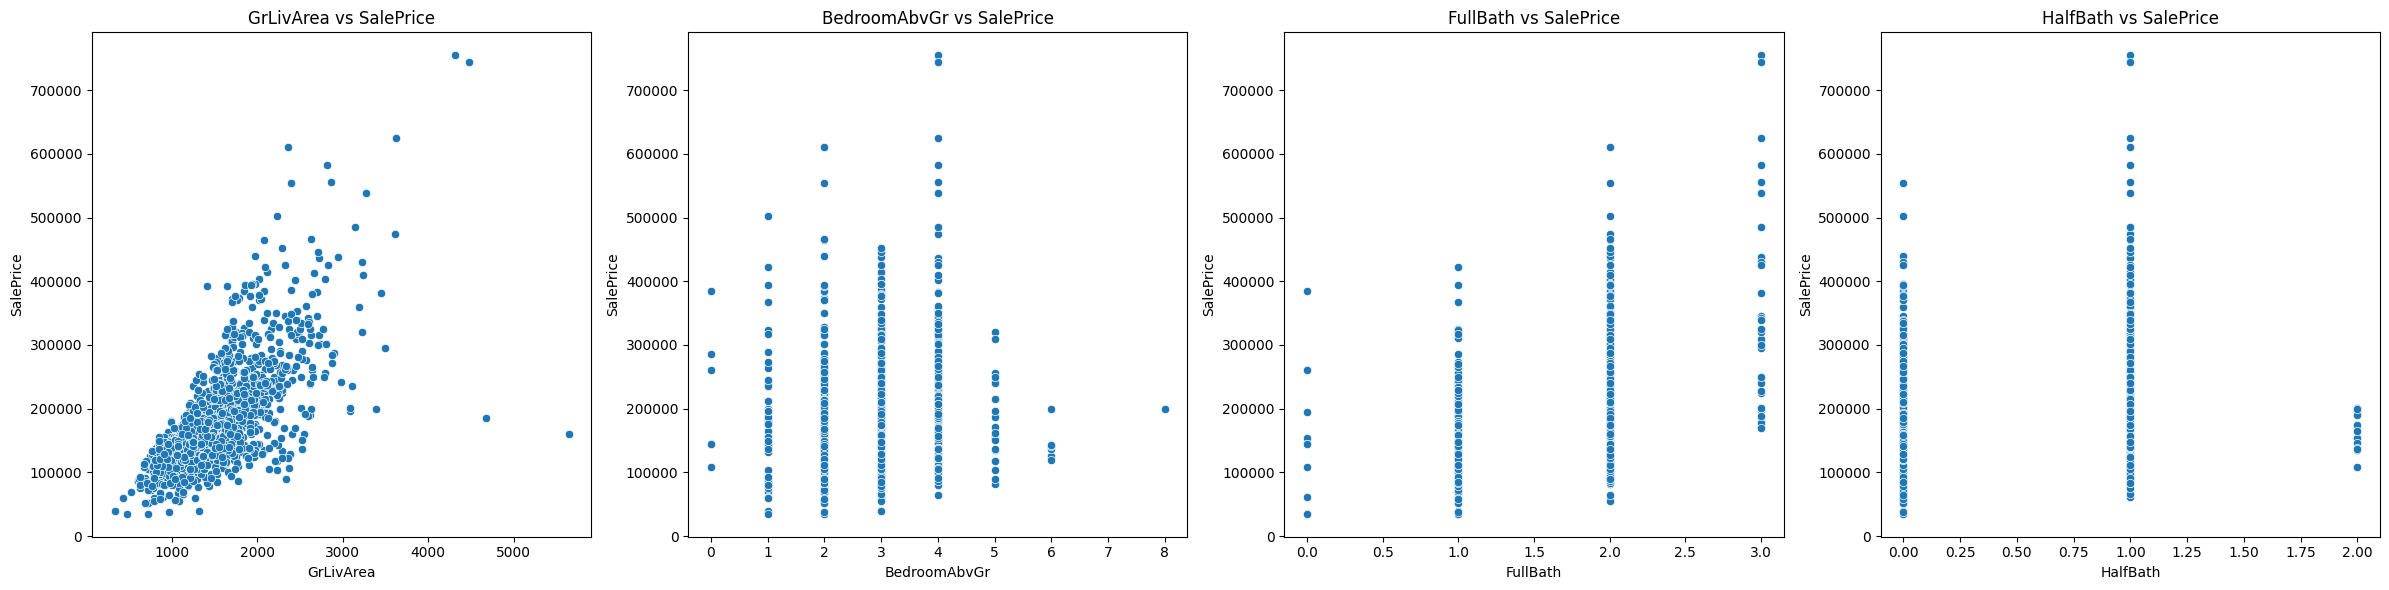

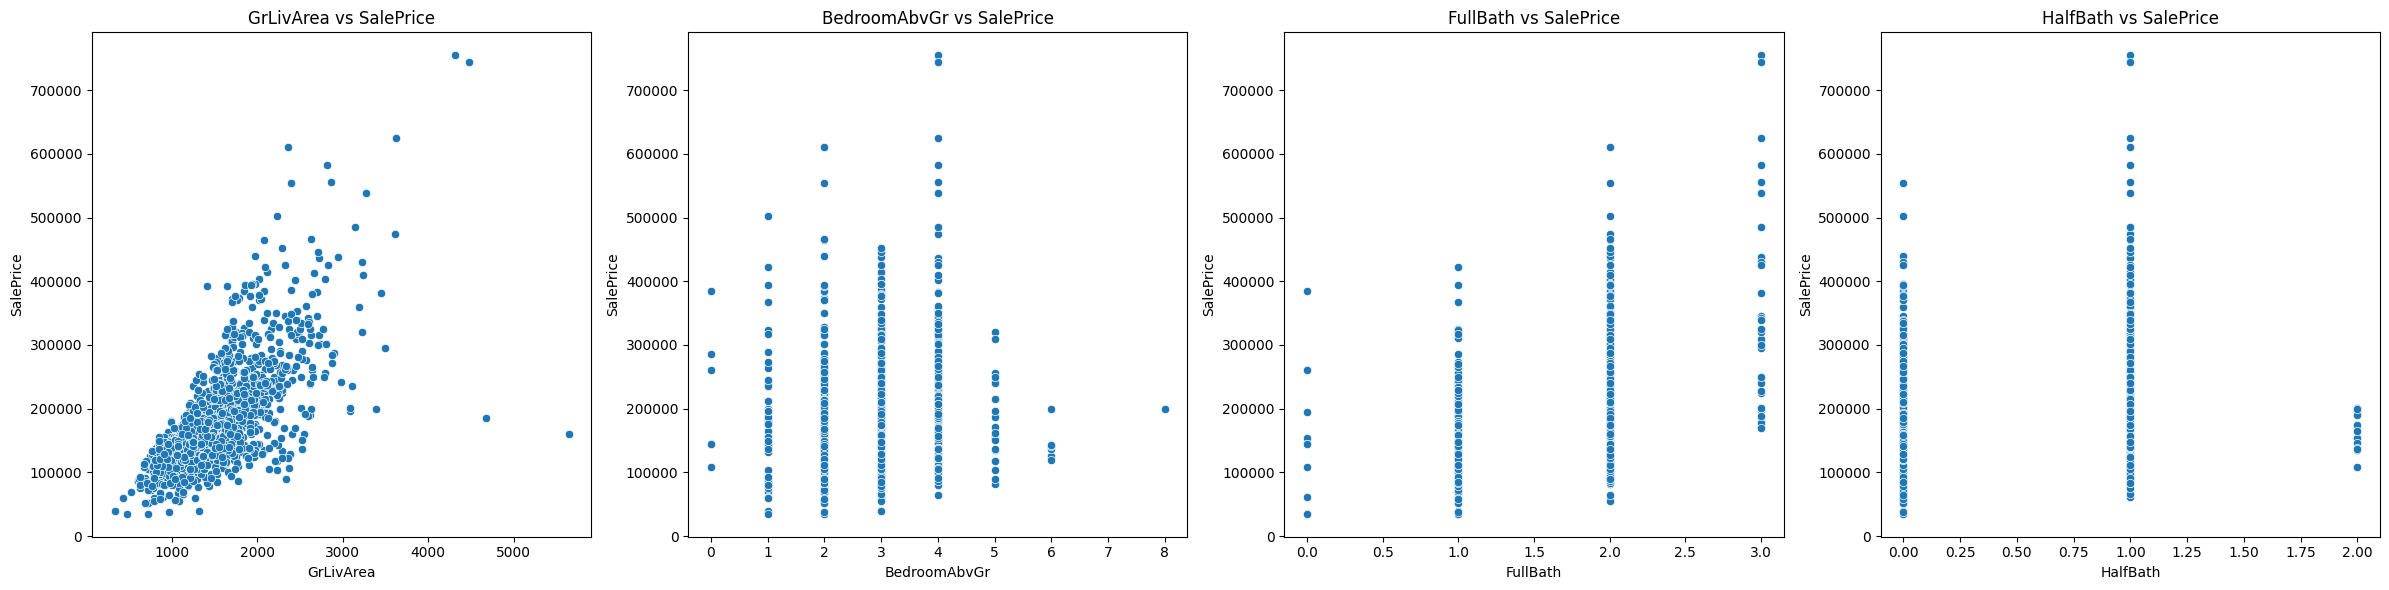

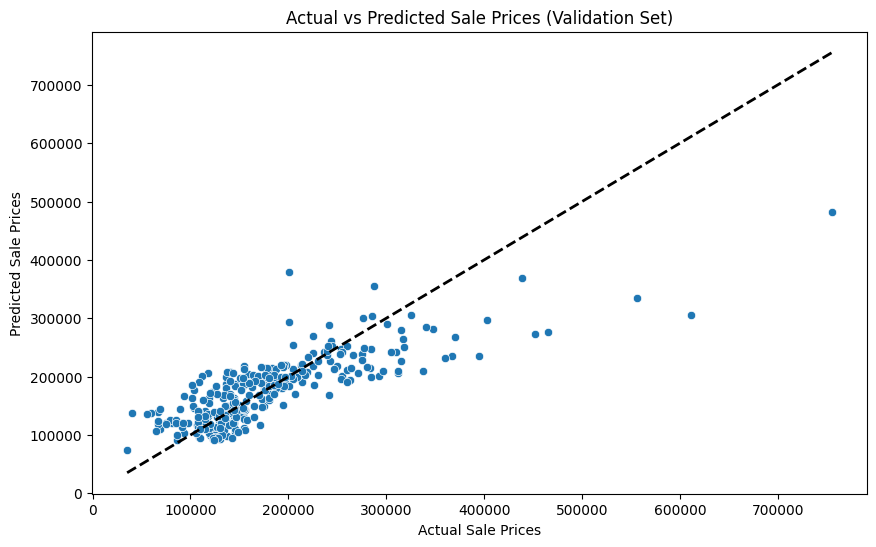

Submission file created.


In [22]:
# Visualize the relationship between features and target
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
for i, feature in enumerate(features):
    sns.scatterplot(x=train_df[feature], y=train_df[target], ax=axes[i])
    axes[i].set_title(f'{feature} vs {target}')
plt.tight_layout()
plt.show()

# Visualize the relationship between features and target
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
for i, feature in enumerate(features):
    sns.scatterplot(x=train_df[feature], y=train_df[target], ax=axes[i])
    axes[i].set_title(f'{feature} vs {target}')
plt.tight_layout()
plt.show()

# Convert y_val and val_predictions to 1D arrays
y_val_1d = y_val.values.flatten()
val_predictions_1d = val_predictions.flatten()

# Visualize the model performance
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=val_predictions)
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs Predicted Sale Prices (Validation Set)')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.show()

# Prepare the submission
submission['SalePrice'] = test_predictions
submission.to_csv('submission.csv', index=False)
print('Submission file created.')